#**Assignment 2 | IAI5101(GNG5300) Winter 2022 | Zain Ur-Rehman | 300207267 | zurre072@uottawa.ca**

**Import Libraries**

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from datetime import date, time, datetime
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

# **(A)EDA and (B)Feature Engineering**

After uploading heart.csv on google drive, use drive.mount and path to the file.

In [3]:
from google.colab import drive
drive.mount('/content/drive')
print ("\nOnce google drive is mounted and correct file path is provided below,")
print ("it takes about 40 seconds to read the excel file from drive")
df = pd.read_csv("/content/drive/MyDrive/GNG5300/heart.csv") # Takes about 40 seconds to read the file from drive


Mounted at /content/drive

Once google drive is mounted and correct file path is provided below,
it takes about 40 seconds to read the excel file from drive


Printing unique values for all features

In [4]:
# Numerical features
numerical_features = ["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease"]
# Categorical features
categorical_features = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]

# Printing unique values in each numerical_feature
for b in numerical_features:
    print("------------------numerical_feature----------------------"+b+": ")
    #print(sorted(df[b].unique()))
    print(df[b].value_counts())

# Printing unique values in each categorical features
for a in categorical_features:
    print("------------------categorical_feature----------------------"+a+": ")
    #print(sorted(df[a].unique()))
    print(df[a].value_counts())

# Print overall unique possible columns
print ("\nOverall unique possible columns:")
print ("--------------------------------")
for column in df.iloc[:,np.r_[1,2,3,4,5,6,7,8,9,10,11]].columns:
    print("{}:\n{}".format(column,df[column].unique()))    



------------------numerical_feature----------------------Age: 
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64
------------------numerical_feature----------------------RestingBP: 
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64
------------------numerical_feature----------------------Cholesterol: 
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: 

**Univariate analysis**

Using a histogram, plot a distribution of the numerical values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd831a4d90>,
      dtype=object)

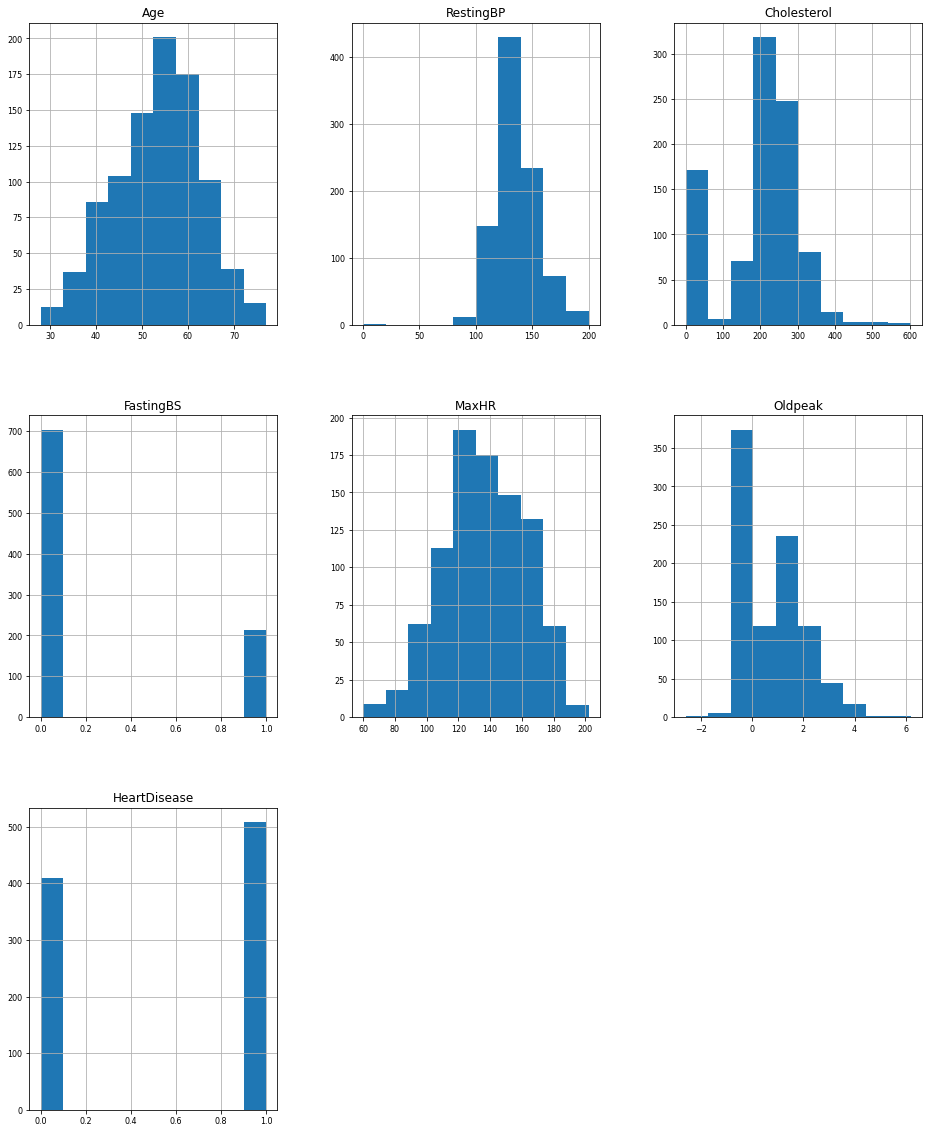

In [5]:
# Histogram of numerical columns
df.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

**Bivariate analysis**

Plot a histogram showing the age against the target variable (positive vs. negative cases)


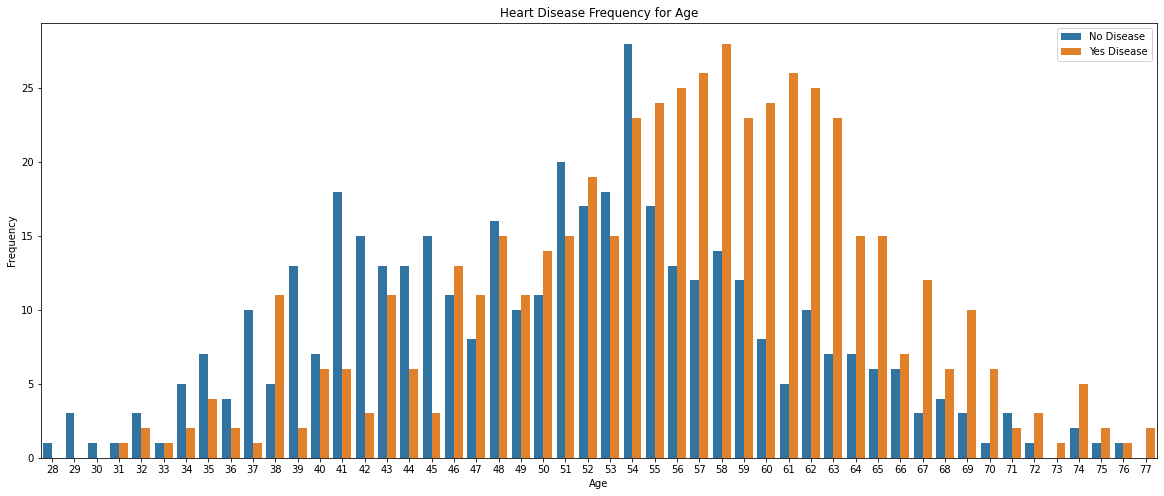

In [6]:
# A histogram showing the age against the target variable (positive vs. negative cases)
plt.figure(figsize = (20,8))
sns.countplot('Age', hue = 'HeartDisease', data = df)

plt.title('Heart Disease Frequency for Age')
plt.legend(['No Disease','Yes Disease'])

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

Compare the median age for male and female using a boxplot

median age positive female cases: 58

median age positive male cases: 57

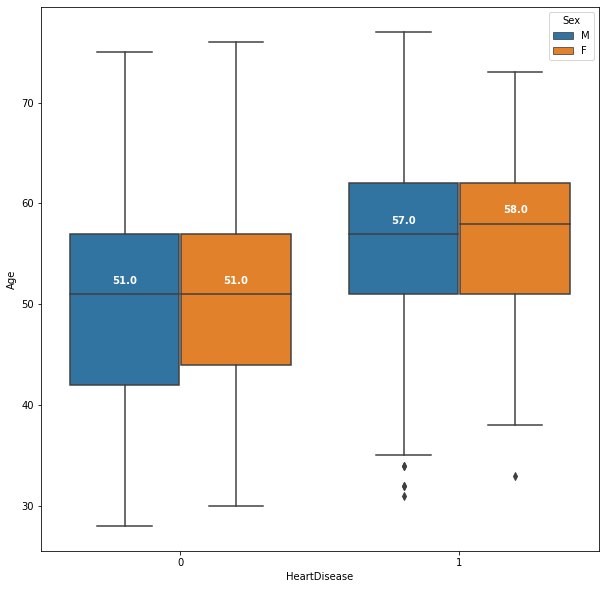

In [7]:
# Compare the median age for male and female using a boxplot
# Reference: https://stackoverflow.com/questions/45475962/labeling-boxplot-with-median-values
# ['M' 'F'] --> [1 0]
plt.figure(figsize=(10,10))
testPlot = sns.boxplot(x='HeartDisease', y='Age', hue='Sex', data=df)
m1 = df.groupby(['HeartDisease', 'Sex'])['Age'].median().values
mL1 = [str(np.round(s, 2)) for s in m1]

ind = 0
for tick in range(len(testPlot.get_xticklabels())):
    testPlot.text(tick-.2, m1[ind+1]+1, mL1[ind+1],  horizontalalignment='center',  color='w', weight='semibold')
    testPlot.text(tick+.2, m1[ind]+1, mL1[ind], horizontalalignment='center', color='w', weight='semibold')
    ind += 2    
plt.show()

**Convert categorical data into numerical data using label encoding**




In [8]:
# Using laberl encoder to convert non-numeric data into numberic data
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
df.ChestPainType = le.fit_transform(df.ChestPainType) 
df.RestingECG = le.fit_transform(df.RestingECG) 
df.ExerciseAngina = le.fit_transform(df.ExerciseAngina) 
df.ST_Slope = le.fit_transform(df.ST_Slope) 
# After label encoding
df.head()

#Sex:
#['M' 'F'] --> [1 0]
#ChestPainType:
#['ATA' 'NAP' 'ASY' 'TA']-->  [1 2 0 3]
#RestingECG:
#['Normal' 'ST' 'LVH'] --> [1 2 0]
#ExerciseAngina:
#['N' 'Y'] --> [0 1]
#ST_Slope:
#['Up' 'Flat' 'Down'] --> [2 1 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


**Multivariate Analysis**

Use a heatmap to check for correlation between predictor variables

These features have positive correlation with HeartDisease:

Age, Sex, RestingBP, FastingBS, ExerciseAngina, Oldpeak


Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-

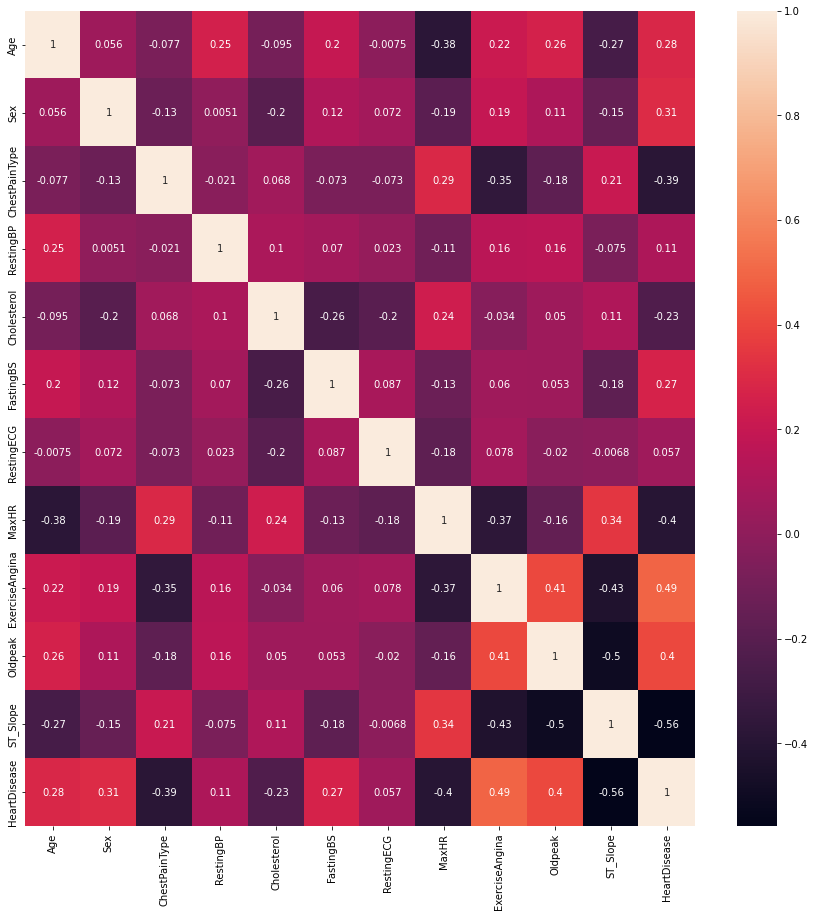

In [9]:
print(df.dtypes)
# All of them numeric i.e. int/float
print(df.info())
fig, ax = plt.subplots(figsize=(15,15))
corrmat=df.corr()
sns.heatmap(corrmat, annot=True);

**Check for duplicates & missing values. Drop, if present**

In [10]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()

# Check for missing values in the data. Using the info() function. All columns are have 918 entries. This means, there is no missing value
print ("\nCheck for missing values in the data. Using the info() function. All columns are have 918 entries. This means, there is no missing value")
print(df.info())
print(df.isnull().sum())


Check for missing values in the data. Using the info() function. All columns are have 918 entries. This means, there is no missing value
<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 93.2 KB
None
Age               0
Sex               0
ChestPainType     0
RestingBP 

**There are some outliers in the dataset, (e.g., 0 cholesterol, negative oldpeak) handle them before building the model**

In [11]:
print("Before removing the negative and 0 cholesterol")
print("---------------------------------------------")
print( df['Cholesterol'].value_counts() )
# Get names of indexes for which column Cholesterol has value less than 0 or negative
a = df.index[df['Cholesterol'] < 1.0]
print (a)
df = df.drop(index=a)
print("\nAfter removing the negative and 0 Cholesterol")
print("------------------------------------------------")
print( df['Cholesterol'].value_counts() )

print("Before removing the negative and 0 Oldpeak")
print("---------------------------------------------")
print( df['Oldpeak'].value_counts() )
# Get names of indexes for which column Cholesterol has value less than 0 or negative
a = df.index[df['Oldpeak'] < 0.0]
print (a)
df = df.drop(index=a)
print("\nAfter removing the negative and 0 Oldpeak")
print("------------------------------------------------")
print( df['Oldpeak'].value_counts() )


Before removing the negative and 0 cholesterol
---------------------------------------------
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64
Int64Index([293, 294, 295, 296, 297, 298, 299, 300, 301, 302,
            ...
            481, 483, 484, 492, 508, 514, 515, 518, 535, 536],
           dtype='int64', length=172)

After removing the negative and 0 Cholesterol
------------------------------------------------
254    11
223    10
220    10
216     9
230     9
       ..
347     1
365     1
412     1
491     1
131     1
Name: Cholesterol, Length: 221, dtype: int64
Before removing the negative and 0 Oldpeak
---------------------------------------------
 0.0    317
 1.0     68
 2.0     58
 1.5     39
 3.0     23
 1.2     22
 0.2     19
 1.8     15
 0.8     15
 1.4     15
 0.6     14
 1.6     13
 0.5     12
 2.5     11
 0.4     10
 0.1     10
 0.3      9
 4.0      8
 1.9  

**Check for class imbalance**

There seems no class imbalance. 

For no heart disease, the count is around 380.

For yes heard disease, the count is around 350.

Not much difference so this looks like a balanced dataset.

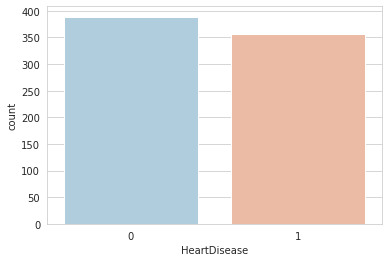

In [12]:
# Check for class imbalance. 
# There seems no class imbalance. 
# For no heart disease, the count is around 380.
# For yes heard disease, the count is around 350.
# Not much difference so this looks like a balanced dataset.

sns.set_style('whitegrid')
sns.countplot(x='HeartDisease',data=df,palette='RdBu_r')

**Scale the data using a standard scaler**

Why standard scaling? Because there are features that have lot of variation and also measured in different units.

So when different units, prefer standard scaling. This will re-scale the values within the same distribution.

In [13]:
# Scale the data using a standard scaler
# Why standard scaling? Because there are features that have lot of variation and also measured in different units.
# So when different units, prefer standard scaling. This will re-scale the values within the same distribution.

columns_to_scale = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
standardScaler = StandardScaler()
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

# Normalization 
# The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range.
#columns_to_standardize = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
#df[columns_to_standardize] = MinMaxScaler().fit_transform(df[columns_to_standardize])

Make X and Y dataframes prior to test train split

Using a train (70%) and test (30%) dataset split

Accuracy, Precision, Sensitivity, F1 and Specificity scores get lower in general for all classifiers when only few features (Age,Sex, RestingBP,FastingBS,ExerciseAngina,Oldpeak) with higher correlation to HeartDisease are in X.

Therefore, I have included all features in X.

X_train, X_test, y_train, y_test

In [15]:
X=df.filter(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'], axis=1) # Keep it pandas.core.frame.DataFrame
#X=df.filter(['Age', 'Sex', 'RestingBP', 'FastingBS', 'ExerciseAngina', 'Oldpeak'], axis=1) 
Y=df.filter(['HeartDisease'], axis=1).squeeze() # Change from pandas.core.frame.Dataframe to pandas.core.series.Series


In [16]:
# train_test_split based on X_CleanDF_correlation (few features in X with higher / positive correlation)
X_train, X_test, y_train, y_test= train_test_split(X,Y,stratify=Y, test_size=0.3,random_state=0)#splitting data in 70% train, 30%test

# stratify=Y. This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.
# For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure th


# Model Development I

**Ensemble Method**

Following models part of Ensemble method:

(1)KNN_k5_classifier with k=5

(2)SVM_classifier with kernel='rbf'

(3)DecisionTree_classifier_grid with Optimal depth of the decision tree:  max_depth: 1

(4)xgBoost_classifier

Both Ensemble approaches votesoft_classifier and votehard_classifier are explored.

**Other classifiers explored that are not part of Ensemble method**:

DecisionTree_classifier (default without any depth)

gradBoost_classifier


**KNN (k=5)**

<>================================================================================================<>
<>============================== KNN_k5_classifier RESULTS: ==================================<>
<>================================================================================================<>

<>-----The 5 fold KNN_k5_classifier_Score cross validation: ----------<>
[0.82857143 0.875      0.84615385 0.875      0.78846154]

<>-----KNN_k5_classifier_Score Mean and Standard Deviation: ----------<>
0.8426373626373627 0.03237257072501307

<>-----KNN_k5_classifier confusion_matrix: ---------------------------<>
[[105  12]
 [ 22  85]]

<>-----KNN_k5_classifier accuracy score: -----------------------------------<>
0.8482142857142857

<>-----KNN_k5_classifier Classification report: ----------------------<>
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       117
           1       0.88      0.79      0.83       107

    accuracy           

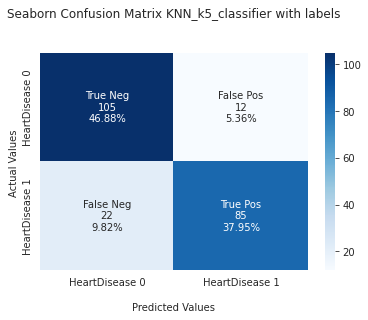

In [17]:
# KNN (k=5)
KNN_k5_classifier = KNeighborsClassifier(n_neighbors=5)
KNN_k5_classifier.fit(X_train, y_train)
y_pred_KNN_k5_classifier = KNN_k5_classifier.predict(X_test)

print("<>================================================================================================<>")
print("<>============================== KNN_k5_classifier RESULTS: ==================================<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_KNN_k5_classifier = confusion_matrix(y_test, y_pred_KNN_k5_classifier)
accuracy_KNN_k5_classifier = accuracy_score(y_test, y_pred_KNN_k5_classifier)
#accuracy_KNN_k5_classifier = accuracy_score(y_pred_KNN_k5_classifier, y_test)
# cross_val_score
KNN_k5_classifier_Score = cross_val_score(KNN_k5_classifier, X_train, y_train, cv=5)
print("\n<>-----The 5 fold KNN_k5_classifier_Score cross validation: ----------<>")
print(KNN_k5_classifier_Score)
# Getting mean
print("\n<>-----KNN_k5_classifier_Score Mean and Standard Deviation: ----------<>")
print(KNN_k5_classifier_Score.mean(), KNN_k5_classifier_Score.std())
print("\n<>-----KNN_k5_classifier confusion_matrix: ---------------------------<>")
print(cm_KNN_k5_classifier)
print("\n<>-----KNN_k5_classifier accuracy score: -----------------------------------<>")
print(accuracy_KNN_k5_classifier)
print("\n<>-----KNN_k5_classifier Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_KNN_k5_classifier))
print("\n<>-----KNN_k5_classifier confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that HeartDisease 0
# False Negatives (FN): Model incorrectly predicted that HeartDisease 0 
# True Positives (TP): Model correctly predicted that HeartDisease 1
# False Positives (FP): Model incorrectly predicted that HeartDisease 1

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_KNN_k5_classifier.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_KNN_k5_classifier.flatten()/np.sum(cm_KNN_k5_classifier)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_KNN_k5_classifier, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix KNN_k5_classifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])
ax.yaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])

## Display the visualization of the Confusion Matrix.
plt.show()

**SVM with kernel = rbf**

<>================================================================================================<>
<>================================= SVM_classifier RESULTS: ======================================<>
<>================================================================================================<>

<>-------------- The 5 fold SVM_classifier_Score cross validation: -------<>
[0.88571429 0.86538462 0.89423077 0.91346154 0.79807692]

<>----------- SVM_classifier_Score Mean and Standard Deviation: ----------<>
0.8713736263736264 0.03976875859422301

<>----------- SVM_classifier confusion_matrix: ---------------------------<>
[[101  16]
 [ 19  88]]

<>----------- SVM_classifier accuracy: -----------------------------------<>
0.84375

<>----------- SVM_classifier Classification report: ----------------------<>
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       117
           1       0.85      0.82      0.83       107

    accuracy    

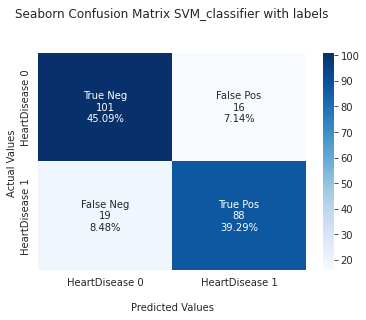

In [18]:
#SVM with kernel = rbf
SVM_classifier =  svm.SVC(kernel='rbf', probability=True)
SVM_classifier.fit(X_train, y_train)
y_pred_SVM_classifier = SVM_classifier.predict(X_test)
SVM_classifier_Score = cross_val_score(SVM_classifier, X_train, y_train, cv=5)

print("<>================================================================================================<>")
print("<>================================= SVM_classifier RESULTS: ======================================<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_SVM_classifier = confusion_matrix(y_test, y_pred_SVM_classifier)
accuracy_SVM_classifier = accuracy_score(y_test, y_pred_SVM_classifier)
# cross_val_score
print("\n<>-------------- The 5 fold SVM_classifier_Score cross validation: -------<>")
print(SVM_classifier_Score)
# Getting mean
print("\n<>----------- SVM_classifier_Score Mean and Standard Deviation: ----------<>")
print(SVM_classifier_Score.mean(), SVM_classifier_Score.std())
print("\n<>----------- SVM_classifier confusion_matrix: ---------------------------<>")
print(cm_SVM_classifier)
print("\n<>----------- SVM_classifier accuracy: -----------------------------------<>")
print(accuracy_SVM_classifier)
print("\n<>----------- SVM_classifier Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_SVM_classifier))
print("\n<>----------- SVM_classifier confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that HeartDisease 0
# False Negatives (FN): Model incorrectly predicted that HeartDisease 0
# True Positives (TP): Model correctly predicted that HeartDisease 1
# False Positives (FP): Model incorrectly predicted that HeartDisease 1

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_SVM_classifier.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_SVM_classifier.flatten()/np.sum(cm_SVM_classifier)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_SVM_classifier, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix SVM_classifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])
ax.yaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])

## Display the visualization of the Confusion Matrix.
plt.show()


**Decision tree (default)**

<>================================================================================================<>
<>============================== DecisionTree_classifier RESULTS: ================================<>
<>================================================================================================<>

<>----- The 5 fold DecisionTree_classifier_Score cross validation: ----------<>
[0.80952381 0.77884615 0.82692308 0.75961538 0.74038462]

<>----- DecisionTree_classifier_Score Mean and Standard Deviation: ----------<>
0.783058608058608 0.03166353632807479

<>----- DecisionTree_classifier confusion_matrix: ---------------------------<>
[[104  13]
 [ 28  79]]

<>----- DecisionTree_classifier accuracy: -----------------------------------<>
0.8169642857142857

<>----- DecisionTree_classifier Classification report: ----------------------<>
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       117
           1       0.86      0.74      0.79   

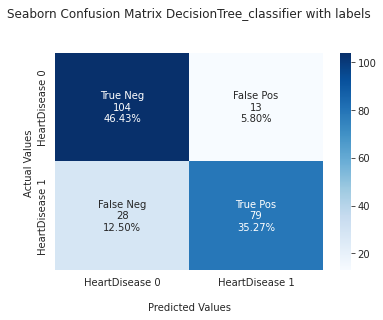

In [19]:
#Decision tree classifier
DecisionTree_classifier = DecisionTreeClassifier()
DecisionTree_classifier.fit(X_train, y_train)
y_pred_DecisionTree_classifier = DecisionTree_classifier.predict(X_test)

print("<>================================================================================================<>")
print("<>============================== DecisionTree_classifier RESULTS: ================================<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_DecisionTree_classifier = confusion_matrix(y_test, y_pred_DecisionTree_classifier)
accuracy_DecisionTree_classifier = accuracy_score(y_test, y_pred_DecisionTree_classifier)
# cross_val_score
DecisionTree_classifier_Score = cross_val_score(DecisionTree_classifier, X_train, y_train, cv=5)
print("\n<>----- The 5 fold DecisionTree_classifier_Score cross validation: ----------<>")
print(DecisionTree_classifier_Score)
# Getting mean
print("\n<>----- DecisionTree_classifier_Score Mean and Standard Deviation: ----------<>")
print(DecisionTree_classifier_Score.mean(), DecisionTree_classifier_Score.std())
print("\n<>----- DecisionTree_classifier confusion_matrix: ---------------------------<>")
print(cm_DecisionTree_classifier)
print("\n<>----- DecisionTree_classifier accuracy: -----------------------------------<>")
print(accuracy_DecisionTree_classifier)
print("\n<>----- DecisionTree_classifier Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_DecisionTree_classifier))
print("\n<>----- DecisionTree_classifier confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that HeartDisease 0 
# False Negatives (FN): Model incorrectly predicted that HeartDisease 0 
# True Positives (TP): Model correctly predicted that HeartDisease 1 
# False Positives (FP): Model incorrectly predicted that HeartDisease 1

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_DecisionTree_classifier.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_DecisionTree_classifier.flatten()/np.sum(cm_DecisionTree_classifier)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_DecisionTree_classifier, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix DecisionTree_classifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])
ax.yaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])

## Display the visualization of the Confusion Matrix.
plt.show()


**Tuned Decision Tree with optimal depth**

<>================================================================================================<>
<>==================== DecisionTree_classifier RESULTS with GridSearchCV Tuning: ===================<>
<>================================================================================================<>
Optimal depth of the decision tree:  {'max_depth': 1}
<>================================================================================================<>
<>============================== DecisionTree_classifier_grid RESULTS: ================================<>
<>================================================================================================<>

<>----- The 5 fold DecisionTree_classifier_grid_Score cross validation: ----------<>
[0.84761905 0.80769231 0.80769231 0.79807692 0.81730769]

<>----- DecisionTree_classifier_grid_Score Mean and Standard Deviation: ----------<>
0.8156776556776558 0.017089335221392138

<>----- DecisionTree_classifier_grid confusion_matrix: --------

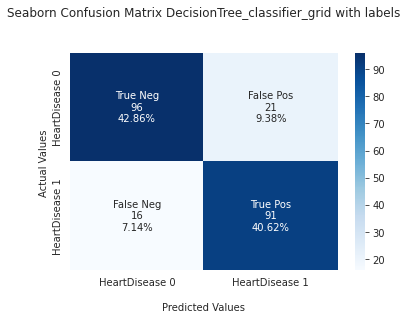

In [20]:
# Tune the model Decision tree classifier using GridSearchCV to find the optimal number of trees.
# This will give us the optimal depth of the decision tree.
# Optimal depth of the decision tree:  {'max_depth': 1} with cv=5

print("<>================================================================================================<>")
print("<>==================== DecisionTree_classifier RESULTS with GridSearchCV Tuning: ===================<>")
print("<>================================================================================================<>")
#print("\n<>----------- GaussianNB_classifier.get_params-----------------------------<>")
#print(DecisionTree_classifier.get_params())
param_grid_dt = {
    'max_depth': [1, 3, 5, 7, 9, 11, 13, 15]
}
DecisionTree_classifier_grid=GridSearchCV(DecisionTree_classifier, param_grid=param_grid_dt, cv=5)
DecisionTree_classifier_grid.fit(X_train, y_train)
#print("\n<>----------- DecisionTree_classifier_grid.cv_results_-----------------------<>")
#print(DecisionTree_classifier_grid.cv_results_)
#DecisionTree_classifier_grid_df = pd.DataFrame(DecisionTree_classifier_grid.cv_results_)
#print("\n<>----------- DecisionTree_classifier_grid.cv_results_ as dataframe----------<>")
#print(DecisionTree_classifier_grid_df)
print("Optimal depth of the decision tree: ",DecisionTree_classifier_grid.best_params_)

y_pred_DecisionTree_classifier_grid_optimalTreeDepth = DecisionTree_classifier_grid.predict(X_test)

print("<>================================================================================================<>")
print("<>============================== DecisionTree_classifier_grid RESULTS: ================================<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_DecisionTree_classifier_grid = confusion_matrix(y_test, y_pred_DecisionTree_classifier_grid_optimalTreeDepth)
accuracy_DecisionTree_classifier_grid = accuracy_score(y_test, y_pred_DecisionTree_classifier_grid_optimalTreeDepth)
# cross_val_score
DecisionTree_classifier_grid_Score = cross_val_score(DecisionTree_classifier_grid, X_train, y_train, cv=5)
print("\n<>----- The 5 fold DecisionTree_classifier_grid_Score cross validation: ----------<>")
print(DecisionTree_classifier_grid_Score)
# Getting mean
print("\n<>----- DecisionTree_classifier_grid_Score Mean and Standard Deviation: ----------<>")
print(DecisionTree_classifier_grid_Score.mean(), DecisionTree_classifier_grid_Score.std())
print("\n<>----- DecisionTree_classifier_grid confusion_matrix: ---------------------------<>")
print(cm_DecisionTree_classifier_grid)
print("\n<>----- DecisionTree_classifier_grid accuracy: -----------------------------------<>")
print(accuracy_DecisionTree_classifier_grid)
print("\n<>----- DecisionTree_classifier_grid Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_DecisionTree_classifier_grid_optimalTreeDepth))
print("\n<>----- DecisionTree_classifier_grid confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that HeartDisease 0 
# False Negatives (FN): Model incorrectly predicted that HeartDisease 0 
# True Positives (TP): Model correctly predicted that HeartDisease 1 
# False Positives (FP): Model incorrectly predicted that HeartDisease 1

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_DecisionTree_classifier_grid.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_DecisionTree_classifier_grid.flatten()/np.sum(cm_DecisionTree_classifier_grid)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_DecisionTree_classifier_grid, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix DecisionTree_classifier_grid with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])
ax.yaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])

## Display the visualization of the Confusion Matrix.
plt.show()


**xgBoost**

<>================================================================================================<>
<>============================== xgBoost_classifier RESULTS: ================================<>
<>================================================================================================<>

<>----- The 5 fold xgBoost_classifier_Score cross validation: ----------<>
[0.84761905 0.86538462 0.875      0.91346154 0.81730769]

<>----- xgBoost_classifier_Score Mean and Standard Deviation: ----------<>
0.8637545787545788 0.03167827958506335

<>----- xgBoost_classifier confusion_matrix: ---------------------------<>
[[105  12]
 [ 17  90]]

<>----- xgBoost_classifier accuracy: -----------------------------------<>
0.8705357142857143

<>----- xgBoost_classifier Classification report: ----------------------<>
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       117
           1       0.88      0.84      0.86       107

    accuracy        

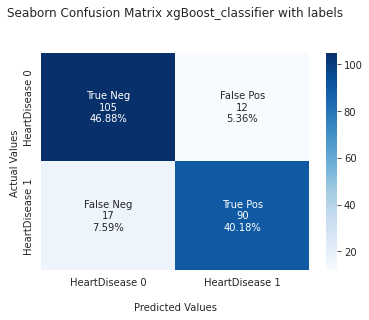

In [21]:
# XGboost classifier
xgBoost_classifier = xgb.XGBClassifier()
xgBoost_classifier.fit(X_train, y_train)
y_pred_xgBoost_classifier = xgBoost_classifier.predict(X_test)

print("<>================================================================================================<>")
print("<>============================== xgBoost_classifier RESULTS: ================================<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_xgBoost_classifier = confusion_matrix(y_test, y_pred_xgBoost_classifier)
accuracy_xgBoost_classifier = accuracy_score(y_test, y_pred_xgBoost_classifier)
# cross_val_score
xgBoost_classifier_Score = cross_val_score(xgBoost_classifier, X_train, y_train, cv=5)
print("\n<>----- The 5 fold xgBoost_classifier_Score cross validation: ----------<>")
print(xgBoost_classifier_Score)
# Getting mean
print("\n<>----- xgBoost_classifier_Score Mean and Standard Deviation: ----------<>")
print(xgBoost_classifier_Score.mean(), xgBoost_classifier_Score.std())
print("\n<>----- xgBoost_classifier confusion_matrix: ---------------------------<>")
print(cm_xgBoost_classifier)
print("\n<>----- xgBoost_classifier accuracy: -----------------------------------<>")
print(accuracy_xgBoost_classifier)
print("\n<>----- xgBoost_classifier Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_xgBoost_classifier))
print("\n<>----- xgBoost_classifier confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that HeartDisease 0 
# False Negatives (FN): Model incorrectly predicted that HeartDisease 0 
# True Positives (TP): Model correctly predicted that HeartDisease 1 
# False Positives (FP): Model incorrectly predicted that HeartDisease 1

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_xgBoost_classifier.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_xgBoost_classifier.flatten()/np.sum(cm_xgBoost_classifier)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_xgBoost_classifier, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix xgBoost_classifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])
ax.yaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])

## Display the visualization of the Confusion Matrix.
plt.show()

**gradBoost**

<>================================================================================================<>
<>============================== gradBoost_classifier RESULTS: ================================<>
<>================================================================================================<>

<>----- The 5 fold gradBoost_classifier_Score cross validation: ----------<>
[0.82857143 0.83653846 0.85576923 0.875      0.84615385]

<>----- gradBoost_classifier_Score Mean and Standard Deviation: ----------<>
0.8484065934065933 0.01612934525291234

<>----- gradBoost_classifier confusion_matrix: ---------------------------<>
[[103  14]
 [ 18  89]]

<>----- gradBoost_classifier accuracy: -----------------------------------<>
0.8571428571428571

<>----- gradBoost_classifier Classification report: ----------------------<>
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       117
           1       0.86      0.83      0.85       107

    accu

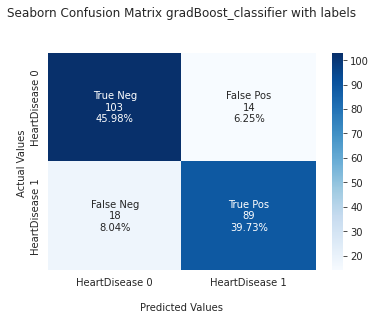

In [22]:
gradBoost_classifier = GradientBoostingClassifier()
gradBoost_classifier.fit(X_train, y_train)
y_pred_gradBoost_classifier = gradBoost_classifier.predict(X_test)

print("<>================================================================================================<>")
print("<>============================== gradBoost_classifier RESULTS: ================================<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_gradBoost_classifier = confusion_matrix(y_test, y_pred_gradBoost_classifier)
accuracy_gradBoost_classifier = accuracy_score(y_test, y_pred_gradBoost_classifier)
# cross_val_score
gradBoost_classifier_Score = cross_val_score(gradBoost_classifier, X_train, y_train, cv=5)
print("\n<>----- The 5 fold gradBoost_classifier_Score cross validation: ----------<>")
print(gradBoost_classifier_Score)
# Getting mean
print("\n<>----- gradBoost_classifier_Score Mean and Standard Deviation: ----------<>")
print(gradBoost_classifier_Score.mean(), gradBoost_classifier_Score.std())
print("\n<>----- gradBoost_classifier confusion_matrix: ---------------------------<>")
print(cm_gradBoost_classifier)
print("\n<>----- gradBoost_classifier accuracy: -----------------------------------<>")
print(accuracy_gradBoost_classifier)
print("\n<>----- gradBoost_classifier Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_gradBoost_classifier))
print("\n<>----- gradBoost_classifier confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that HeartDisease 0 
# False Negatives (FN): Model incorrectly predicted that HeartDisease 0 
# True Positives (TP): Model correctly predicted that HeartDisease 1 
# False Positives (FP): Model incorrectly predicted that HeartDisease 1

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_gradBoost_classifier.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_gradBoost_classifier.flatten()/np.sum(cm_gradBoost_classifier)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_gradBoost_classifier, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix gradBoost_classifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])
ax.yaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])

## Display the visualization of the Confusion Matrix.
plt.show()


**Combining classifiers KNN (k=5), SVM (kernel = rbf), DT with optimal tree number, and xgboost classifiers into a single soft/hard voting classifier.**

These classiifiers were choses in voting classifier as it was the requirement of the assignment: 

Use a majority voting approach to predict class label using KNN (k=5), SVM (kernel = rbf), DT (ensure you find optimal tree), and XGboost classifiers Note: In majority voting, the predicted class label for a particular sample is the class label that represents the majority of the class labels predicted by each individual classifier.


**Majority Voting Soft**

<>================================================================================================<>
<>============================== votesoft_classifier RESULTS: ================================<>
<>================================================================================================<>

<>----- The 5 fold votesoft_classifier_Score cross validation: ----------<>
[0.87619048 0.86538462 0.875      0.89423077 0.83653846]

<>----- votesoft_classifier_Score Mean and Standard Deviation: ----------<>
0.8694688644688645 0.01892098295321054

<>----- votesoft_classifier confusion_matrix: ---------------------------<>
[[104  13]
 [ 19  88]]

<>----- votesoft_classifier accuracy: -----------------------------------<>
0.8571428571428571

<>----- votesoft_classifier Classification report: ----------------------<>
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.87      0.82      0.85       107

    accuracy  

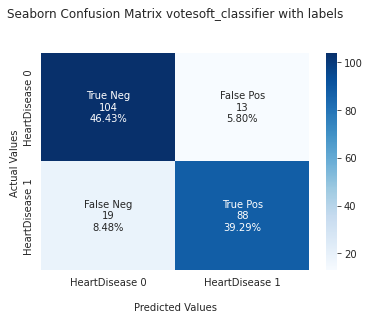

In [25]:
# Combining all above classifiers (KNN (k=5), SVM (kernel = rbf), DT with optimal tree number, and xgboost classifiers) into a single soft voting classifier.
votesoft_classifier = VotingClassifier(
    estimators=[('KNN', KNN_k5_classifier),
                ('SVM', SVM_classifier), 
                ('DT', DecisionTree_classifier_grid), 
                ('XGboost', xgBoost_classifier)],
    voting='soft')
votesoft_classifier.fit(X_train, y_train)
y_pred_votesoft_classifier = votesoft_classifier.predict(X_test)

print("<>================================================================================================<>")
print("<>============================== votesoft_classifier RESULTS: ================================<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_votesoft_classifier = confusion_matrix(y_test, y_pred_votesoft_classifier)
accuracy_votesoft_classifier = accuracy_score(y_test, y_pred_votesoft_classifier)
# cross_val_score
votesoft_classifier_Score = cross_val_score(votesoft_classifier, X_train, y_train, cv=5)
print("\n<>----- The 5 fold votesoft_classifier_Score cross validation: ----------<>")
print(votesoft_classifier_Score)
# Getting mean
print("\n<>----- votesoft_classifier_Score Mean and Standard Deviation: ----------<>")
print(votesoft_classifier_Score.mean(), votesoft_classifier_Score.std())
print("\n<>----- votesoft_classifier confusion_matrix: ---------------------------<>")
print(cm_votesoft_classifier)
print("\n<>----- votesoft_classifier accuracy: -----------------------------------<>")
print(accuracy_votesoft_classifier)
print("\n<>----- votesoft_classifier Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_votesoft_classifier))
print("\n<>----- votesoft_classifier confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that HeartDisease 0 
# False Negatives (FN): Model incorrectly predicted that HeartDisease 0 
# True Positives (TP): Model correctly predicted that HeartDisease 1 
# False Positives (FP): Model incorrectly predicted that HeartDisease 1

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_votesoft_classifier.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_votesoft_classifier.flatten()/np.sum(cm_votesoft_classifier)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_votesoft_classifier, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix votesoft_classifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])
ax.yaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Majority voting hard**

<>================================================================================================<>
<>============================== votehard_classifier RESULTS: ================================<>
<>================================================================================================<>

<>----- The 5 fold votehard_classifier_Score cross validation: ----------<>
[0.87619048 0.82692308 0.89423077 0.89423077 0.82692308]

<>----- votehard_classifier_Score Mean and Standard Deviation: ----------<>
0.8636996336996337 0.030741996930748625

<>----- votehard_classifier confusion_matrix: ---------------------------<>
[[104  13]
 [ 19  88]]

<>----- votehard_classifier accuracy: -----------------------------------<>
0.8571428571428571

<>----- votehard_classifier Classification report: ----------------------<>
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.87      0.82      0.85       107

    accuracy 

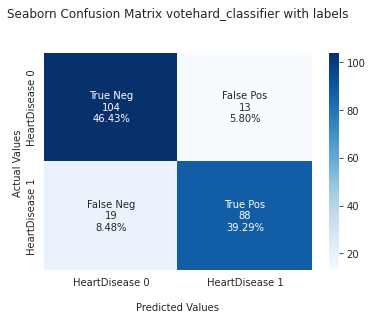

In [26]:
votehard_classifier = VotingClassifier(
    estimators=[('KNN', KNN_k5_classifier),
                ('SVM', SVM_classifier), 
                ('DT', DecisionTree_classifier_grid), 
                ('XGboost', xgBoost_classifier)],
    voting='hard')
votehard_classifier.fit(X_train, y_train)
y_pred_votehard_classifier = votehard_classifier.predict(X_test)

print("<>================================================================================================<>")
print("<>============================== votehard_classifier RESULTS: ================================<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_votehard_classifier = confusion_matrix(y_test, y_pred_votehard_classifier)
accuracy_votehard_classifier = accuracy_score(y_test, y_pred_votehard_classifier)
# cross_val_score
votehard_classifier_Score = cross_val_score(votehard_classifier, X_train, y_train, cv=5)
print("\n<>----- The 5 fold votehard_classifier_Score cross validation: ----------<>")
print(votehard_classifier_Score)
# Getting mean
print("\n<>----- votehard_classifier_Score Mean and Standard Deviation: ----------<>")
print(votehard_classifier_Score.mean(), votehard_classifier_Score.std())
print("\n<>----- votehard_classifier confusion_matrix: ---------------------------<>")
print(cm_votehard_classifier)
print("\n<>----- votehard_classifier accuracy: -----------------------------------<>")
print(accuracy_votehard_classifier)
print("\n<>----- votehard_classifier Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_votehard_classifier))
print("\n<>----- votehard_classifier confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that HeartDisease 0 
# False Negatives (FN): Model incorrectly predicted that HeartDisease 0 
# True Positives (TP): Model correctly predicted that HeartDisease 1 
# False Positives (FP): Model incorrectly predicted that HeartDisease 1

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_votehard_classifier.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_votehard_classifier.flatten()/np.sum(cm_votehard_classifier)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_votehard_classifier, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix votehard_classifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])
ax.yaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Model Development II

Deep learning with Keras

3 models are explored with different activation functions in the first hidden layer of the model:

(1)Keras_model1_clf with activation='tanh'

(2)Keras_model2_clf with activation='relu'

(3)Keras_model3_clf with activation='sigmoid'


In [27]:
# Keras 
# Reference: https://blog.pythian.com/heart-disease-prediction-using-keras-deep-learning/
# Reference: https://machinelearningmastery.com/faq/single-faq/how-do-you-define-the-input-layer-in-keras/
from keras.models import Sequential
from keras.layers import Dense

# In the first line, we set the model as sequential. 
# Then, we add the three fully connected dense layers: two hidden and one output. 
# These are defined using the dense class. The first level has a dimension of 
# 11 which corresponds to 11 column attributes in X.

# Use tanh to set the activation function
# In addition, the first and second layers has 30, 20 nodes/neurons.
# More nodes and layers means more capacity for the network to learn. 

# 3 activation functions are explored. 
# Keras_model1_clf with first and second layer activation='tanh'
# Keras_model2_clf with first and second layer activation='relu'
# Keras_model3_clf with first and second layer activation='sigmoid'
# The output layer has a single neuron (output) and the sigmoid activation 
# function suited for binary classification problems

Keras_model1_clf = Sequential()
Keras_model1_clf.add(Dense(30, input_dim=11, activation='tanh'))
Keras_model1_clf.add(Dense(20, activation='tanh'))
Keras_model1_clf.add(Dense(1, activation='sigmoid'))

# Use relu to set the activation function
# The second layer has 20 neurons and the tanh activation function
# The output layer has a single neuron (output) and the sigmoid activation 
# function suited for binary classification problems
Keras_model2_clf = Sequential()
Keras_model2_clf.add(Dense(30, input_dim=11, activation='relu'))
Keras_model2_clf.add(Dense(20, activation='relu'))
Keras_model2_clf.add(Dense(1, activation='sigmoid'))

# Use sigmoid to set the activation function
# The second layer has 20 neurons and the tanh activation function
# The output layer has a single neuron (output) and the sigmoid activation 
# function suited for binary classification problems
Keras_model3_clf = Sequential()
Keras_model3_clf.add(Dense(30, input_dim=11, activation='sigmoid'))
Keras_model3_clf.add(Dense(20, activation='sigmoid'))
Keras_model3_clf.add(Dense(1, activation='sigmoid'))


# The compile function has three arguments
# adam optimizer: An algorithm for first-order gradient-based optimization.
# binary_crossentropy loss function: logarithmic loss, which for a binary 
# classification problem is defined in Keras as binary_crossentropy.
# accuracy metric: to evaluate the performance of your model during training 
# and testing
# set the epochs=100 and let the model train

Keras_model1_clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
Keras_model1_clf.fit(X_train, y_train, epochs=100, batch_size=10)

Keras_model2_clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
Keras_model2_clf.fit(X_train, y_train, epochs=100, batch_size=10)

Keras_model3_clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
Keras_model3_clf.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
53/53 [==============================] - 1s 2ms/step - loss: 0.5039 - accuracy: 0.8119
Epoch 2/100
53/53 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8445
Epoch 3/100
53/53 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.8560
Epoch 4/100
53/53 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8522
Epoch 5/100
53/53 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8599
Epoch 6/100
53/53 [==============================] - 0s 2ms/step - loss: 0.3440 - accuracy: 0.8618
Epoch 7/100
53/53 [==============================] - 0s 2ms/step - loss: 0.3422 - accuracy: 0.8637
Epoch 8/100
53/53 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.8599
Epoch 9/100
53/53 [==============================] - 0s 2ms/step - loss: 0.3356 - accuracy: 0.8695
Epoch 10/100
53/53 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.8695
Epoch 11/

**Keras_model1_clf with activation='tanh'**

<>================================================================================================<>
<>============================== Keras_model1_clf RESULTS: ==================================<>
<>================================================================================================<>

<>-----Keras_model1_clf Summary: ---------------------------<>
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                360       
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
______________________

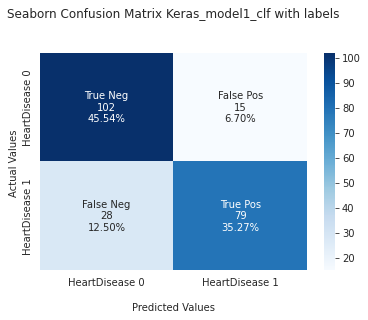

In [28]:
y_pred_Keras_model1_clf = Keras_model1_clf.predict(X_test)

print("<>================================================================================================<>")
print("<>============================== Keras_model1_clf RESULTS: ==================================<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_Keras_model1_clf = confusion_matrix(y_test, np.round(y_pred_Keras_model1_clf))
accuracy_Keras_model1_clf = accuracy_score(y_test, np.round(y_pred_Keras_model1_clf))


print ("\n<>-----Keras_model1_clf Summary: ---------------------------<>")
print (Keras_model1_clf.summary())

print ("\n<>-----Keras_model1_clf score: ---------------------------<>")
score_Keras_model1_clf = Keras_model1_clf.evaluate(X_test, y_test, verbose=0)
print('Keras_model1_clf score = ',score_Keras_model1_clf[1])

print("\n<>-----Keras_model1_clf confusion_matrix: ---------------------------<>")
print(cm_Keras_model1_clf)
print("\n<>-----Keras_model1_clf accuracy: -----------------------------------<>")
print(accuracy_Keras_model1_clf)
print("\n<>-----Keras_model1_clf Classification report: ----------------------<>")
print(metrics.classification_report(y_test, np.round(y_pred_Keras_model1_clf)))
print("\n<>-----Keras_model1_clf confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that HeartDisease 0
# False Negatives (FN): Model incorrectly predicted that HeartDisease 0 
# True Positives (TP): Model correctly predicted that HeartDisease 1
# False Positives (FP): Model incorrectly predicted that HeartDisease 1

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_Keras_model1_clf.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_Keras_model1_clf.flatten()/np.sum(cm_Keras_model1_clf)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_Keras_model1_clf, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix Keras_model1_clf with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])
ax.yaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Keras_model2_clf with activation='relu'**

<>================================================================================================<>
<>============================== Keras_model2_clf RESULTS: ==================================<>
<>================================================================================================<>

<>-----Keras_model2_clf Summary: ---------------------------<>
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                360       
                                                                 
 dense_4 (Dense)             (None, 20)                620       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
____________________

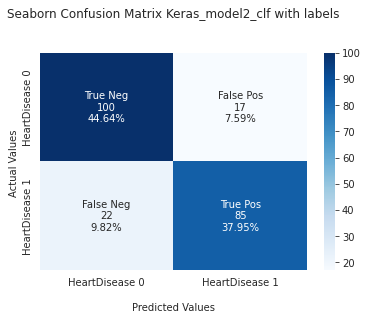

In [29]:
y_pred_Keras_model2_clf = Keras_model2_clf.predict(X_test)

print("<>================================================================================================<>")
print("<>============================== Keras_model2_clf RESULTS: ==================================<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_Keras_model2_clf = confusion_matrix(y_test, np.round(y_pred_Keras_model2_clf))
accuracy_Keras_model2_clf = accuracy_score(y_test, np.round(y_pred_Keras_model2_clf))


print ("\n<>-----Keras_model2_clf Summary: ---------------------------<>")
print (Keras_model2_clf.summary())

print ("\n<>-----Keras_model2_clf score: ---------------------------<>")
score_Keras_model2_clf = Keras_model2_clf.evaluate(X_test, y_test, verbose=0)
print('Keras_model2_clf score = ',score_Keras_model2_clf[1])

print("\n<>-----Keras_model2_clf confusion_matrix: ---------------------------<>")
print(cm_Keras_model2_clf)
print("\n<>-----Keras_model2_clf accuracy: -----------------------------------<>")
print(accuracy_Keras_model2_clf)
print("\n<>-----Keras_model2_clf Classification report: ----------------------<>")
print(metrics.classification_report(y_test, np.round(y_pred_Keras_model2_clf)))
print("\n<>-----Keras_model2_clf confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that HeartDisease 0
# False Negatives (FN): Model incorrectly predicted that HeartDisease 0 
# True Positives (TP): Model correctly predicted that HeartDisease 1
# False Positives (FP): Model incorrectly predicted that HeartDisease 1

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_Keras_model2_clf.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_Keras_model2_clf.flatten()/np.sum(cm_Keras_model2_clf)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_Keras_model2_clf, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix Keras_model2_clf with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])
ax.yaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Keras_model3_clf with activation='sigmoid'**

<>================================================================================================<>
<>============================== Keras_model3_clf RESULTS: ==================================<>
<>================================================================================================<>

<>-----Keras_model3_clf Summary: ---------------------------<>
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                360       
                                                                 
 dense_7 (Dense)             (None, 20)                620       
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
____________________

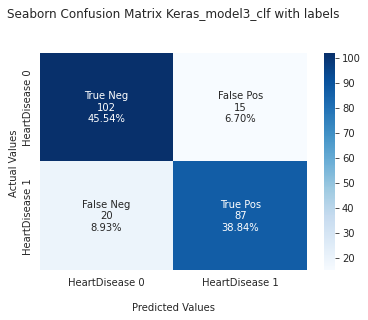

In [30]:
y_pred_Keras_model3_clf = Keras_model3_clf.predict(X_test)

print("<>================================================================================================<>")
print("<>============================== Keras_model3_clf RESULTS: ==================================<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_Keras_model3_clf = confusion_matrix(y_test, np.round(y_pred_Keras_model3_clf))
accuracy_Keras_model3_clf = accuracy_score(y_test, np.round(y_pred_Keras_model3_clf))


print ("\n<>-----Keras_model3_clf Summary: ---------------------------<>")
print (Keras_model3_clf.summary())

print ("\n<>-----Keras_model3_clf score: ---------------------------<>")
score_Keras_model3_clf = Keras_model3_clf.evaluate(X_test, y_test, verbose=0)
print('Keras_model3_clf score = ',score_Keras_model3_clf[1])

print("\n<>-----Keras_model3_clf confusion_matrix: ---------------------------<>")
print(cm_Keras_model3_clf)
print("\n<>-----Keras_model3_clf accuracy: -----------------------------------<>")
print(accuracy_Keras_model3_clf)
print("\n<>-----Keras_model3_clf Classification report: ----------------------<>")
print(metrics.classification_report(y_test, np.round(y_pred_Keras_model3_clf)))
print("\n<>-----Keras_model3_clf confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that HeartDisease 0
# False Negatives (FN): Model incorrectly predicted that HeartDisease 0 
# True Positives (TP): Model correctly predicted that HeartDisease 1
# False Positives (FP): Model incorrectly predicted that HeartDisease 1

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_Keras_model3_clf.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_Keras_model3_clf.flatten()/np.sum(cm_Keras_model3_clf)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_Keras_model3_clf, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix Keras_model3_clf with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])
ax.yaxis.set_ticklabels(['HeartDisease 0','HeartDisease 1'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Calculating Accuracy, Precision, Sensitivity, F1 and Specitivity using formulas**

In [31]:
total1_KNN_k5=sum(sum(cm_KNN_k5_classifier))
Accuracy_KNN_k5 = (cm_KNN_k5_classifier[0,0]+cm_KNN_k5_classifier[1,1])/total1_KNN_k5
Precision_KNN_k5 = cm_KNN_k5_classifier[1,1]/(cm_KNN_k5_classifier[1,1]+cm_KNN_k5_classifier[0,1])
Sensitivity_recall_KNN_k5 = cm_KNN_k5_classifier[1,1]/(cm_KNN_k5_classifier[1,0]+cm_KNN_k5_classifier[1,1])
F1_KNN_k5 = 2*(Sensitivity_recall_KNN_k5 * Precision_KNN_k5) / (Sensitivity_recall_KNN_k5 + Precision_KNN_k5)
Specificity_KNN_k5 = cm_KNN_k5_classifier[0,0]/(cm_KNN_k5_classifier[0,0]+cm_KNN_k5_classifier[0,1])

total1_SVM_rbf=sum(sum(cm_SVM_classifier))
Accuracy_SVM_rbf = (cm_SVM_classifier[0,0]+cm_SVM_classifier[1,1])/total1_SVM_rbf
Precision_SVM_rbf = cm_SVM_classifier[1,1]/(cm_SVM_classifier[1,1]+cm_SVM_classifier[0,1])
Sensitivity_recall_SVM_rbf = cm_SVM_classifier[1,1]/(cm_SVM_classifier[1,0]+cm_SVM_classifier[1,1])
F1_SVM_rbf = 2*(Sensitivity_recall_SVM_rbf * Precision_SVM_rbf) / (Sensitivity_recall_SVM_rbf + Precision_SVM_rbf)
Specificity_SVM_rbf = cm_SVM_classifier[0,0]/(cm_SVM_classifier[0,0]+cm_SVM_classifier[0,1])

total1_DT=sum(sum(cm_DecisionTree_classifier))
Accuracy_DT = (cm_DecisionTree_classifier[0,0]+cm_DecisionTree_classifier[1,1])/total1_DT
Precision_DT = cm_DecisionTree_classifier[1,1]/(cm_DecisionTree_classifier[1,1]+cm_DecisionTree_classifier[0,1])
Sensitivity_recall_DT = cm_DecisionTree_classifier[1,1]/(cm_DecisionTree_classifier[1,0]+cm_DecisionTree_classifier[1,1])
F1_DT = 2*(Sensitivity_recall_DT * Precision_DT) / (Sensitivity_recall_DT + Precision_DT)
Specificity_DT = cm_DecisionTree_classifier[0,0]/(cm_DecisionTree_classifier[0,0]+cm_DecisionTree_classifier[0,1])

total1_DT_optimalDepth=sum(sum(cm_DecisionTree_classifier_grid))
Accuracy_DT_optimalDepth = (cm_DecisionTree_classifier_grid[0,0]+cm_DecisionTree_classifier_grid[1,1])/total1_DT_optimalDepth
Precision_DT_optimalDepth = cm_DecisionTree_classifier_grid[1,1]/(cm_DecisionTree_classifier_grid[1,1]+cm_DecisionTree_classifier_grid[0,1])
Sensitivity_recall_DT_optimalDepth = cm_DecisionTree_classifier_grid[1,1]/(cm_DecisionTree_classifier_grid[1,0]+cm_DecisionTree_classifier_grid[1,1])
F1_DT_optimalDepth = 2*(Sensitivity_recall_DT_optimalDepth * Precision_DT_optimalDepth) / (Sensitivity_recall_DT_optimalDepth + Precision_DT_optimalDepth)
Specificity_DT_optimalDepth = cm_DecisionTree_classifier_grid[0,0]/(cm_DecisionTree_classifier_grid[0,0]+cm_DecisionTree_classifier_grid[0,1])

total1_xgBoost=sum(sum(cm_xgBoost_classifier))
Accuracy_xgBoost = (cm_xgBoost_classifier[0,0]+cm_xgBoost_classifier[1,1])/total1_xgBoost
Precision_xgBoost = cm_xgBoost_classifier[1,1]/(cm_xgBoost_classifier[1,1]+cm_xgBoost_classifier[0,1])
Sensitivity_recall_xgBoost = cm_xgBoost_classifier[1,1]/(cm_xgBoost_classifier[1,0]+cm_xgBoost_classifier[1,1])
F1_xgBoost = 2*(Sensitivity_recall_xgBoost * Precision_xgBoost) / (Sensitivity_recall_xgBoost + Precision_xgBoost)
Specificity_xgBoost = cm_xgBoost_classifier[0,0]/(cm_xgBoost_classifier[0,0]+cm_xgBoost_classifier[0,1])

total1_gradBoost=sum(sum(cm_gradBoost_classifier))
Accuracy_gradBoost = (cm_gradBoost_classifier[0,0]+cm_gradBoost_classifier[1,1])/total1_gradBoost
Precision_gradBoost = cm_gradBoost_classifier[1,1]/(cm_gradBoost_classifier[1,1]+cm_gradBoost_classifier[0,1])
Sensitivity_recall_gradBoost = cm_gradBoost_classifier[1,1]/(cm_gradBoost_classifier[1,0]+cm_gradBoost_classifier[1,1])
F1_gradBoost = 2*(Sensitivity_recall_gradBoost * Precision_gradBoost) / (Sensitivity_recall_gradBoost + Precision_gradBoost)
Specificity_gradBoost = cm_gradBoost_classifier[0,0]/(cm_gradBoost_classifier[0,0]+cm_gradBoost_classifier[0,1])

total1_voteSoft=sum(sum(cm_votesoft_classifier))
Accuracy_voteSoft = (cm_votesoft_classifier[0,0]+cm_votesoft_classifier[1,1])/total1_voteSoft
Precision_voteSoft = cm_votesoft_classifier[1,1]/(cm_votesoft_classifier[1,1]+cm_votesoft_classifier[0,1])
Sensitivity_recall_voteSoft = cm_votesoft_classifier[1,1]/(cm_votesoft_classifier[1,0]+cm_votesoft_classifier[1,1])
F1_voteSoft = 2*(Sensitivity_recall_voteSoft * Precision_voteSoft) / (Sensitivity_recall_voteSoft + Precision_voteSoft)
Specificity_voteSoft = cm_votesoft_classifier[0,0]/(cm_votesoft_classifier[0,0]+cm_votesoft_classifier[0,1])

total1_voteHard=sum(sum(cm_votehard_classifier))
Accuracy_voteHard = (cm_votehard_classifier[0,0]+cm_votehard_classifier[1,1])/total1_voteHard
Precision_voteHard = cm_votehard_classifier[1,1]/(cm_votehard_classifier[1,1]+cm_votehard_classifier[0,1])
Sensitivity_recall_voteHard = cm_votehard_classifier[1,1]/(cm_votehard_classifier[1,0]+cm_votehard_classifier[1,1])
F1_voteHard = 2*(Sensitivity_recall_voteHard * Precision_voteHard) / (Sensitivity_recall_voteHard + Precision_voteHard)
Specificity_voteHard = cm_votehard_classifier[0,0]/(cm_votehard_classifier[0,0]+cm_votehard_classifier[0,1])

total1_keras_act_tanh=sum(sum(cm_Keras_model1_clf))
Accuracy_keras_act_tanh = (cm_Keras_model1_clf[0,0]+cm_Keras_model1_clf[1,1])/total1_keras_act_tanh
Precision_keras_act_tanh = cm_Keras_model1_clf[1,1]/(cm_Keras_model1_clf[1,1]+cm_Keras_model1_clf[0,1])
Sensitivity_recall_keras_act_tanh = cm_Keras_model1_clf[1,1]/(cm_Keras_model1_clf[1,0]+cm_Keras_model1_clf[1,1])
F1_keras_act_tanh = 2*(Sensitivity_recall_keras_act_tanh * Precision_keras_act_tanh) / (Sensitivity_recall_keras_act_tanh + Precision_keras_act_tanh)
Specificity_keras_act_tanh = cm_Keras_model1_clf[0,0]/(cm_Keras_model1_clf[0,0]+cm_Keras_model1_clf[0,1])

total1_keras_act_relu=sum(sum(cm_Keras_model2_clf))
Accuracy_keras_act_relu = (cm_Keras_model2_clf[0,0]+cm_Keras_model2_clf[1,1])/total1_keras_act_relu
Precision_keras_act_relu = cm_Keras_model2_clf[1,1]/(cm_Keras_model2_clf[1,1]+cm_Keras_model2_clf[0,1])
Sensitivity_recall_keras_act_relu = cm_Keras_model2_clf[1,1]/(cm_Keras_model2_clf[1,0]+cm_Keras_model2_clf[1,1])
F1_keras_act_relu = 2*(Sensitivity_recall_keras_act_relu * Precision_keras_act_relu) / (Sensitivity_recall_keras_act_relu + Precision_keras_act_relu)
Specificity_keras_act_relu = cm_Keras_model2_clf[0,0]/(cm_Keras_model2_clf[0,0]+cm_Keras_model2_clf[0,1])

total1_keras_act_sigm=sum(sum(cm_Keras_model3_clf))
Accuracy_keras_act_sigm = (cm_Keras_model3_clf[0,0]+cm_Keras_model3_clf[1,1])/total1_keras_act_sigm
Precision_keras_act_sigm = cm_Keras_model3_clf[1,1]/(cm_Keras_model3_clf[1,1]+cm_Keras_model3_clf[0,1])
Sensitivity_recall_keras_act_sigm = cm_Keras_model3_clf[1,1]/(cm_Keras_model3_clf[1,0]+cm_Keras_model3_clf[1,1])
F1_keras_act_sigm = 2*(Sensitivity_recall_keras_act_sigm * Precision_keras_act_sigm) / (Sensitivity_recall_keras_act_sigm + Precision_keras_act_sigm)
Specificity_keras_act_sigm = cm_Keras_model3_clf[0,0]/(cm_Keras_model3_clf[0,0]+cm_Keras_model3_clf[0,1])

Accuracy = [Accuracy_KNN_k5,Accuracy_SVM_rbf,Accuracy_DT,Accuracy_DT_optimalDepth,Accuracy_xgBoost,Accuracy_gradBoost,Accuracy_voteSoft,Accuracy_voteHard,Accuracy_keras_act_tanh,Accuracy_keras_act_relu,Accuracy_keras_act_sigm]
Precision = [Precision_KNN_k5,Precision_SVM_rbf,Precision_DT,Precision_DT_optimalDepth,Precision_xgBoost,Precision_gradBoost,Precision_voteSoft,Precision_voteHard,Precision_keras_act_tanh,Precision_keras_act_relu,Precision_keras_act_sigm]
Sensitivity_recall = [Sensitivity_recall_KNN_k5,Sensitivity_recall_SVM_rbf,Sensitivity_recall_DT,Sensitivity_recall_DT_optimalDepth,Sensitivity_recall_xgBoost,Sensitivity_recall_gradBoost,Sensitivity_recall_voteSoft,Sensitivity_recall_voteHard,Sensitivity_recall_keras_act_tanh,Sensitivity_recall_keras_act_relu,Sensitivity_recall_keras_act_sigm]
F1 = [F1_KNN_k5,F1_SVM_rbf,F1_DT,F1_DT_optimalDepth,F1_xgBoost,F1_gradBoost,F1_voteSoft,F1_voteHard,F1_keras_act_tanh,F1_keras_act_relu,F1_keras_act_sigm]
Specificity = [Specificity_KNN_k5,Specificity_SVM_rbf,Specificity_DT,Specificity_DT_optimalDepth,Specificity_xgBoost,Specificity_gradBoost,Specificity_voteSoft,Specificity_voteHard,Specificity_keras_act_tanh,Specificity_keras_act_relu,Specificity_keras_act_sigm]
algorithms = ["KNN_k5","SVM_rbf", "DT", "DT_OptDepth", "xgBoost", "gradBoost", "voteSoft", "voteHard", "keras_tan", "keras_rel", "keras_sig" ] 


In [34]:
# Getting min and max and printing the results.
# Reference:https://stackoverflow.com/questions/2474015/getting-the-index-of-the-returned-max-or-min-item-using-max-min-on-a-list

maxValueIndex_Accuracy=Accuracy.index(max(Accuracy))
minValueIndex_Accuracy=Accuracy.index(min(Accuracy))

maxValueIndex_Precision=Precision.index(max(Precision))
minValueIndex_Precision=Precision.index(min(Precision))

maxValueIndex_Sensitivity_recall=Sensitivity_recall.index(max(Sensitivity_recall))
minValueIndex_Sensitivity_recall=Sensitivity_recall.index(min(Sensitivity_recall))

maxValueIndex_F1=F1.index(max(F1))
minValueIndex_F1=F1.index(min(F1))

maxValueIndex_Specificity=Specificity.index(max(Specificity))
minValueIndex_Specificity=Specificity.index(min(Specificity))

algorithmsNames = ["KNN with k=5","SVM with rbf kernal", "Decision Tree (default)", "Decision Tree with Optimal Tree depth", "xgBoost", "gradBoost", "Majority voting Soft", "Majority voting Hard", "Keras with tanh activation", "Keras with relu activation", "Keras with sigmoid activation" ] 

print ("Highest Accuracy scroing algorithm is:           ",algorithmsNames[maxValueIndex_Accuracy],"                        ", round(Accuracy[maxValueIndex_Accuracy]*100,2),"%" )
print ("Lowest Accuracy scroing algorithm is:            ",algorithmsNames[minValueIndex_Accuracy],"        ", round(Accuracy[minValueIndex_Accuracy]*100,2),"%" )
print ("\nHighest Precision scroing algorithm is:          ",algorithmsNames[maxValueIndex_Precision],"                        ", round(Precision[maxValueIndex_Precision]*100,2),"%" )
print ("Lowest Precision scroing algorithm is:           ",algorithmsNames[minValueIndex_Precision],"     ", round(Precision[minValueIndex_Precision]*100,2),"%" )
print ("\nHighest Sensitivity_recall scroing algorithm is: ",algorithmsNames[maxValueIndex_Sensitivity_recall],"                        ", round(Sensitivity_recall[maxValueIndex_Sensitivity_recall]*100,2),"%" )
print ("Lowest Sensitivity_recall scroing algorithm is:  ",algorithmsNames[minValueIndex_Sensitivity_recall],"        ", round(Sensitivity_recall[minValueIndex_Sensitivity_recall]*100,2),"%" )
print ("\nHighest F1 scroing algorithm is:                 ",algorithmsNames[maxValueIndex_F1],"                        ", round(F1[maxValueIndex_F1]*100,2),"%" )
print ("Lowest F1 scroing algorithm is:                  ",algorithmsNames[minValueIndex_F1],"        ", round(F1[minValueIndex_F1]*100,2),"%" )
print ("\nHighest Specificity scroing algorithm is:        ",algorithmsNames[maxValueIndex_Specificity],"                   ", round(Specificity[maxValueIndex_Specificity]*100,2),"%" )
print ("Lowest Specificity scroing algorithm is:         ",algorithmsNames[minValueIndex_Specificity],"     ", round(Specificity[minValueIndex_Specificity]*100,2),"%" )

Highest Accuracy scroing algorithm is:            xgBoost                          87.05 %
Lowest Accuracy scroing algorithm is:             Keras with tanh activation          80.8 %

Highest Precision scroing algorithm is:           xgBoost                          88.24 %
Lowest Precision scroing algorithm is:            Decision Tree with Optimal Tree depth       81.25 %

Highest Sensitivity_recall scroing algorithm is:  Decision Tree with Optimal Tree depth                          85.05 %
Lowest Sensitivity_recall scroing algorithm is:   Decision Tree (default)          73.83 %

Highest F1 scroing algorithm is:                  xgBoost                          86.12 %
Lowest F1 scroing algorithm is:                   Keras with tanh activation          78.61 %

Highest Specificity scroing algorithm is:         KNN with k=5                     89.74 %
Lowest Specificity scroing algorithm is:          Decision Tree with Optimal Tree depth       82.05 %


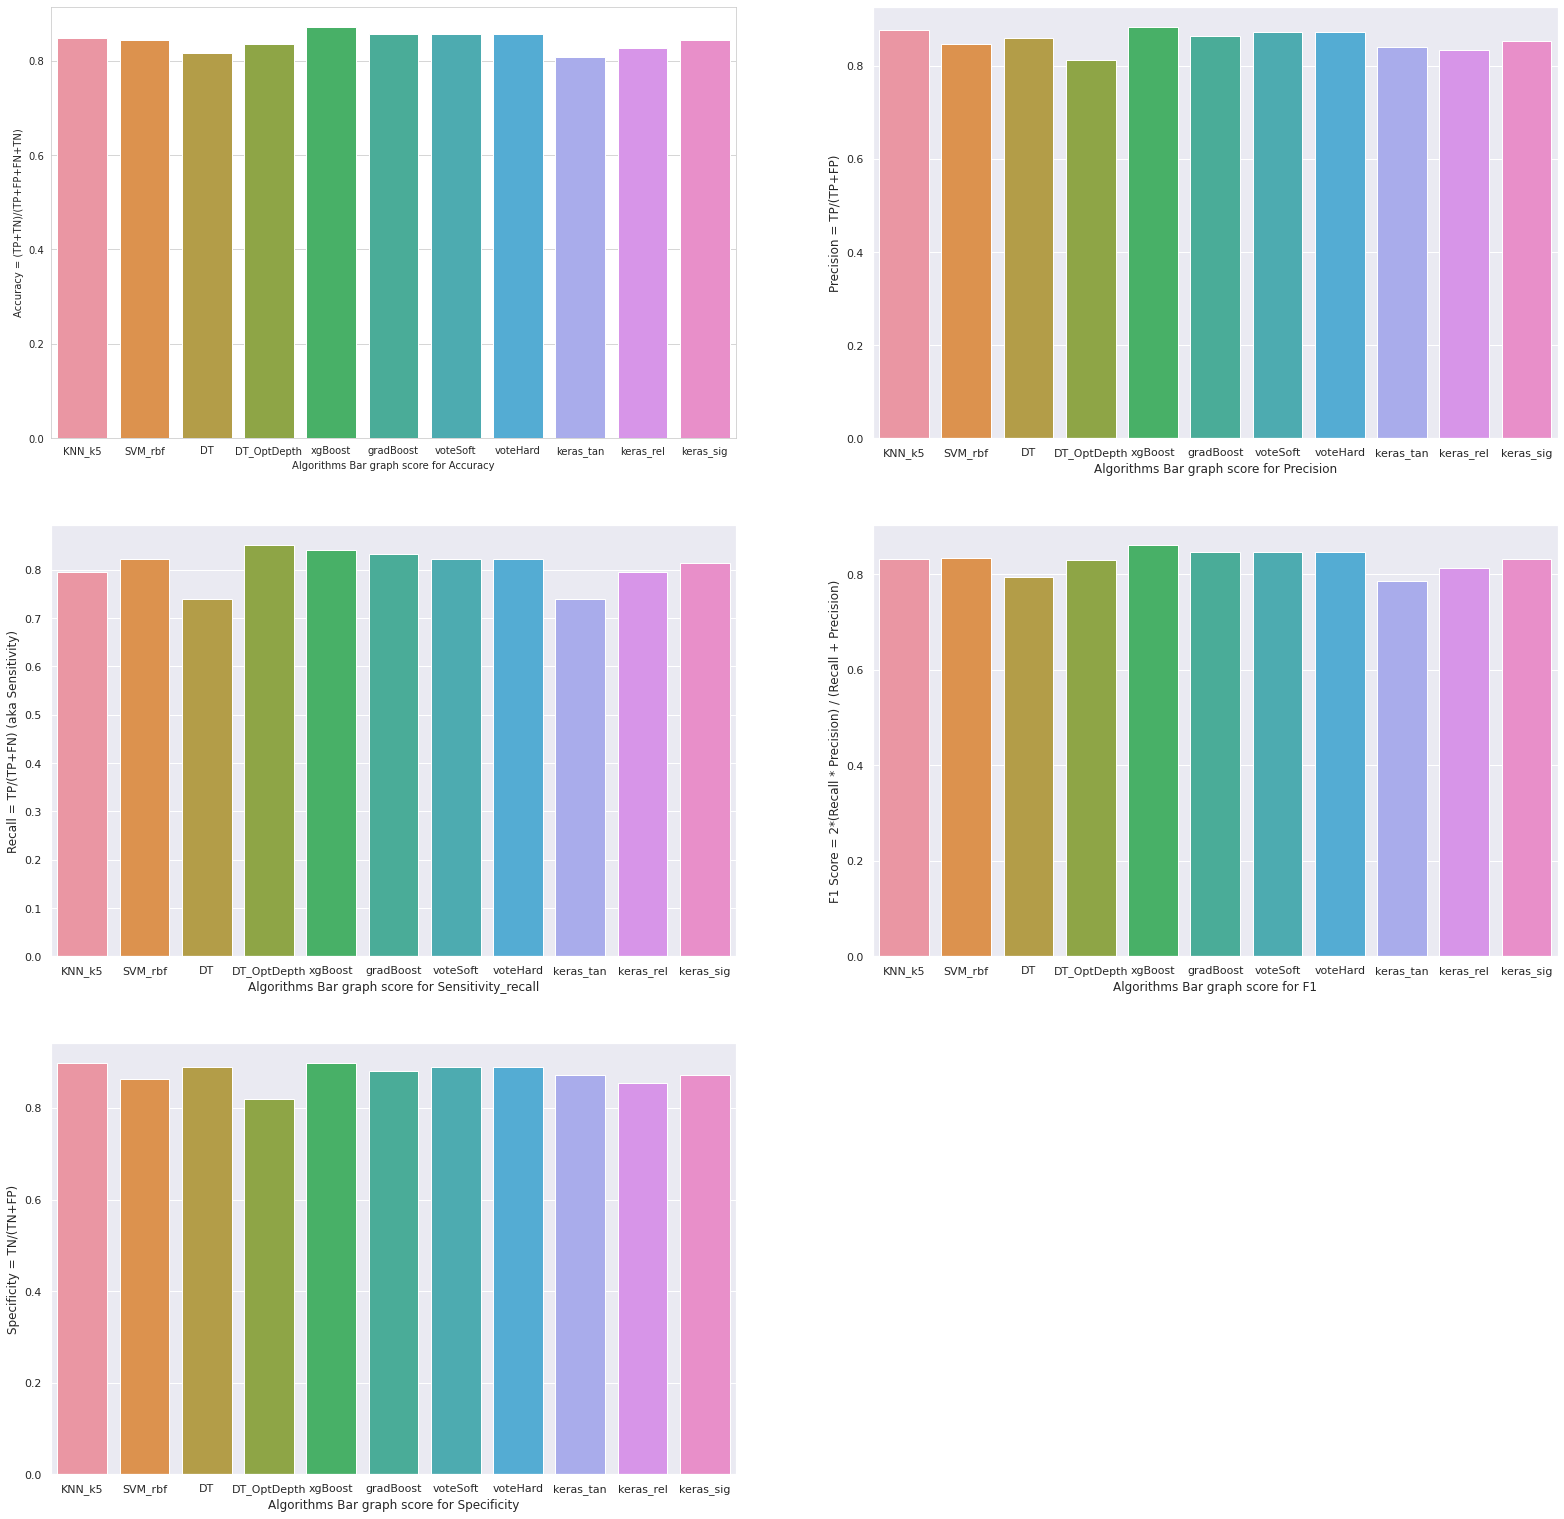

In [35]:
# Plot all measures for all classifiers
#scores = [accuracy_KNN_k5_classifier,accuracy_SVM_classifier,accuracy_DecisionTree_classifier,accuracy_DecisionTree_classifier_grid,accuracy_xgBoost_classifier,accuracy_gradBoost_classifier,accuracy_votesoft_classifier,accuracy_votehard_classifier,accuracy_Keras_model1_clf,accuracy_Keras_model2_clf,accuracy_Keras_model3_clf]

plt.rcParams['figure.figsize'] = (27, 27)

plt.subplot(3, 2, 1)
sns.set(rc={'figure.figsize':(30,30)})
plt.xlabel("Algorithms Bar graph score for Accuracy")
plt.ylabel("Accuracy = (TP+TN)/(TP+FP+FN+TN)")
sns.barplot(algorithms,Accuracy)

plt.subplot(3, 2, 2)
sns.set(rc={'figure.figsize':(30,30)})
plt.xlabel("Algorithms Bar graph score for Precision")
plt.ylabel("Precision = TP/(TP+FP)")
sns.barplot(algorithms,Precision)

plt.subplot(3, 2, 3)
sns.set(rc={'figure.figsize':(30,30)})
plt.xlabel("Algorithms Bar graph score for Sensitivity_recall")
plt.ylabel("Recall = TP/(TP+FN) (aka Sensitivity)")
sns.barplot(algorithms,Sensitivity_recall)

plt.subplot(3, 2, 4)
sns.set(rc={'figure.figsize':(30,30)})
plt.xlabel("Algorithms Bar graph score for F1")
plt.ylabel("F1 Score = 2*(Recall * Precision) / (Recall + Precision)")
sns.barplot(algorithms,F1)

plt.subplot(3, 2, 5)
sns.set(rc={'figure.figsize':(30,30)})
plt.xlabel("Algorithms Bar graph score for Specificity")
plt.ylabel("Specificity = TN/(TN+FP)")
sns.barplot(algorithms,Specificity)
